## 1. Investigating $p^*_{C X C' X'}$

From long-shot.ipynb, the Markov chain which precisely hits the GV bound is given by: $$ p^*_{C X C' X'} = p_C \ p_{X|C} \ p_{X'|X} \ p_{C'|X'} $$

where $p_C$ corresponds to Bernoulli$ \left(\frac{1}{2}\right)$, $p_{X|C}$ corresponds to BSC($w$), $p_{X'|X}$ corresponds to BSC($ 𝛿$) and $p_{C'|X'}$ corresponds to BSC($w$), i.e. $ p_C = [ 0.5, 0.5]$, $p_{X|C} = [ 1 - w,w]$, $p_{X'|X} = [ 1-𝛿, 𝛿 ] $, and $p_{C'|X'} = [1 - w, w]$.

Therefore, $p^*_{C X C' X'}$ is given by:
\
$$
\begin{aligned}[c]
&p^* _{C=0,X=0,C'=0,X'=0} = \frac{1}{2}(1 - 𝛿)(1 - w)^2, \\
&p^* _{C=0,X=0,C'=0,X'=1} = \frac{1}{2} 𝛿(1 - w)^2, \\
&p^* _{C=0,X=0,C'=1,X'=0} = \frac{1}{2} w(1 - 𝛿)(1 - w), \\
&p^* _{C=0,X=0,C'=1,X'=1} = \frac{1}{2} w𝛿(1 - w), \\
&p^* _{C=0,X=1,C'=0,X'=0} = \frac{1}{2} w(1 - 𝛿)(1 - w), \\
&p^* _{C=0,X=1,C'=0,X'=1} = \frac{1}{2} w𝛿(1 - w),  \\
&p^* _{C=0,X=1,C'=1,X'=0} = \frac{1}{2} w^2(1 - 𝛿), \\
&p^* _{C=0,X=1,C'=1,X'=1} = \frac{1}{2} w^2𝛿,
\end{aligned}
\hspace{0.4cm}
\begin{aligned}[c]
&p^* _{C=1,X=0,C'=0,X'=0} = \frac{1}{2}(1 - 𝛿)(1 - w)^2 \\
&p^* _{C=1,X=0,C'=0,X'=1} = \frac{1}{2} 𝛿(1 - w)^2 \\
&p^* _{C=1,X=0,C'=1,X'=0} = \frac{1}{2} w(1 - 𝛿)(1 - w) \\
&p^* _{C=1,X=0,C'=1,X'=1} = \frac{1}{2} w𝛿(1 - w) \\
&p^* _{C=1,X=1,C'=0,X'=0} = \frac{1}{2} w(1 - 𝛿)(1 - w) \\
&p^* _{C=1,X=1,C'=0,X'=1} = \frac{1}{2} w𝛿(1 - w)  \\
&p^* _{C=1,X=1,C'=1,X'=0} = \frac{1}{2} w^2(1 - 𝛿) \\
&p^* _{C=1,X=1,C'=1,X'=1} = \frac{1}{2} w^2𝛿
\end{aligned}
$$

\\
It is easy to show that $p^*_{C X C' X'}$ hits the GV bound exactly by evaluating $H_{C X C' X'}$. We also expect that this joint distribution should satisfy all of the constraints we've imposed thus far on the problem, i.e.:

1.   $\sum_{i,j,k,l} {p _{C=i,X=j,C'=k,X'=l}} = 1$
2.   $p_{C}$ is uniform
3.   The joint type $T(\underline{x},\underline{c})$ is typical according to the satellite codeword generation process (including that $d_H(\underline{x},\underline{c}) = nw$)
4.   The joint type $T(\underline{x}',\underline{c}')$ is also typical according to the satellite codeword generation process (including that $d_H(\underline{x}',\underline{c}') = nw$)
5.   The distance $d_H(\underline{x},\underline{x}') = n\delta$

However, only conditions 1 and 2 are satisfied by $p^*_{C X C' X'}$. Both conditions 4 and 5 are not satisfied and interestingly give the same result of $\delta -2\delta w + w$. (Check!) Also, condition 3 does not seem to be satisfied as $T_{x,c}(0,1)+ T_{x,c}(1,0) = \frac{1}{2}$ rather than $w$ (but interestingly, $p^*_{X C' X'}$ did satisfy this condition when the $p_C$ distribution was not included - this happens again for our new distribution below. Unsure why?)

It would be interesting, however, to compare this distribution to the optimiser's output and see if the two distributions are relatively "close" in $\ell_1 $ distance i.e. whether the distribution conforms to a Markov chain of the specified form. As $p^*_{C X C' X'}$ does not seem to satisfy the constraints of the problem, we expect the distribution produced by the optimiser to be quite "far" from this $p^*_{C X C' X'}$.

In [ ]:
import numpy as np

delta = 0.1
w = 0.1

# Assuming a Markov chain
p_C = [0.5, 0.5]  # Bernoulli(1/2)
p_X_given_C = [1 - w, w]  # BSC(w)
p_Xp_given_X = [1 - delta, delta]  # BSC(delta)
p_Cp_given_Xp = [1 - w, w]  # BSC(w)

# Joint distribution of C and X
p_CX = np.outer(p_C, p_X_given_C)
p_XpCp = np.outer(p_Xp_given_X, p_Cp_given_Xp)
p_CXCpXp = np.outer(p_CX, p_XpCp)

print(p_CXCpXp)

The code above is to check that the distribution is being computed correctly. It does agree with $p^*_{C X C' X'}$ above when 𝛿 = 0.1, w = 0.1. And np.sum(p_CXCpXp)
does indeed give 1, as required.

x.value is the array representing the optimized probability distribution (in the original code). This array can then be compared against the theoretical distribution derived above to determine whether the optimiser is performing correctly. This will be done by calculating the $\ell_1$ distance between the theoretical and optimised distributions. In Python, the numpy.linalg.norm function can be used with the parameter ord=1 on the difference of the two probability vectors.

In [ ]:
import numpy as np
import cvxpy as cp
from scipy.stats import entropy

delta = 0.1
w = 0.1

# Assuming a Markov chain
p_C = [0.5, 0.5]  # Bernoulli(1/2)
p_X_given_C = [1 - w, w]  # BSC(w)
p_Xp_given_X = [1 - delta, delta]  # BSC(delta)
p_Cp_given_Xp = [1 - w, w]  # BSC(w)

# Joint distribution of C and X
p_CX = np.outer(p_C, p_X_given_C)
p_XpCp = np.outer(p_Xp_given_X, p_Cp_given_Xp)
p_CXCpXp = np.outer(p_CX, p_XpCp)

#print(p_CXCpXp)

p_CpXp = np.outer(p_Cp_given_Xp, p_Xp_given_X)
p_XCpXp = np.outer(p_X_given_C, p_CpXp)

print(p_XCpXp.flatten())

entdelta = entropy([delta,1-delta], base=2)
T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]   ## See comment on next row
rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)   ## The weight-constrained GV rate is given by this formula -- see the first baseline calculation
entw = entropy([w,1-w], base=2)
x = cp.Variable(8,pos=True)
obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))       ## As above, the worst-case joint distribution corresopnds to the maximizing H(X,C',X') satisfying constraints (below)
constraints=[]
constraints += [cp.sum(x) == 1]
constraints += [x[1]+x[2]+x[5]+x[6] == w]             ## This denotes the constraint p_{XC'X'}(0,0,1) + p_{XC'X'}(0,1,0) + p_{XC'X'}(1,0,1) + p_{XC'X'}(1,1,0) = w, i.e., d_{H}(c',x') = nw, since x' is a satellite codeword of c'
constraints += [x[4]+x[5]+x[6]+x[7] == w]             ## This denotes the constraint p_{XC'X'}(1,0,0) + p_{XC'X'}(1,0,1) + p_{XC'X'}(1,1,0) + p_{XC'X'}(1,1,1) = w, i.e., wt_{H}(x) = nw, since x is a satellite codeword of \underline{0}
constraints += [x[1]+x[3]+x[4]+x[6] <= delta]         ## This denotes the constraint p_{XC'X'}(0,0,1) + p_{XC'X'}(0,1,1) + p_{XC'X'}(1,0,0) + p_{XC'X'}(1,1,0) \leq \delta, i.e., d_{H}(x,x') \leq n\delta, since x' in the Hamming ball of radius n\delta around x for "bad" types
prob = cp.Problem(obj, constraints)
prob.solve()
print("Solution = ", x.value)

# Distributions
dist_th = p_XCpXp.flatten()
dist_opt = x.value

# Calculate the L1 distance
l1_distance = np.linalg.norm(dist_th - dist_opt, ord=1)
print(f"The L1 distance is: {l1_distance}")

[0.729 0.081 0.081 0.009 0.081 0.009 0.009 0.001]
Solution =  [0.72899974 0.00899986 0.08100007 0.08100033 0.00899986 0.00900012
 0.00099996 0.08100007]
The L1 distance is: 0.3040011817525839


This L1 distance is quite significant at 0.304. To investigate further, I added a 𝛿 wrapper around the code to see how $\ell_1$ changes with $w$ for a given 𝛿. The L1 distances vary considerably, but still has a minimum of 0.25 which is considerable - this suggests the optimiser is providing a distribution that is significantly different from $p^*_{C X C' X'}$.

To investigate the optimiser's extremising distribution, which we will denote $p'_{C X C' X'}$, a large dataset was generated (with columns $\delta, w,x_0, x_1,x_2,x_3,x_4,x_5,x_6,x_7$) and an ML model was used to determine the distribution. The first code snippet is the dataset generation, and the latter is the model operating on the data.

In [ ]:
import numpy as np
import cvxpy as cp

# Function to solve the optimization problem for given delta and w
def solve_optimization_problem(delta, w):
    #entdelta = -delta*np.log2(delta) - (1-delta)*np.log2(1-delta)
    #T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]
    #rgv = 2*(-w*np.log2(w) - (1-w)*np.log2(1-w)) - (-np.dot(T, np.log2(T)))

    x = cp.Variable(8, pos=True)
    obj = cp.Maximize(cp.sum(cp.entr(x))/np.log(2))
    constraints = []
    constraints += [cp.sum(x) == 1]
    constraints += [x[1]+x[2]+x[5]+x[6] == w]
    constraints += [x[4]+x[5]+x[6]+x[7] == w]
    constraints += [x[1]+x[3]+x[4]+x[6] <= delta]

    prob = cp.Problem(obj, constraints)
    prob.solve()

    return x.value

# Function to generate dataset
def generate_dataset(delta_range, w_range, delta_steps, w_steps):
    dataset = []
    for delta in np.linspace(delta_range[0], delta_range[1], delta_steps):
        print(delta)
        for w in np.linspace(max(w_range[0](delta), 0), w_range[1], w_steps):
            x_values = solve_optimization_problem(delta, w)
            dataset.append([delta, w] + list(x_values))
    return np.array(dataset)

# Define the range and steps for delta and w
delta_range = (0.01, 0.5)
w_range = (lambda delta: 0.5 * (1 - np.sqrt(1 - 2 * delta)), 1)
delta_steps = 1000  # Number of steps for delta
w_steps = 1000    # Number of steps for w

# Generate the dataset
dataset = generate_dataset(delta_range, w_range, delta_steps, w_steps)
dataset[:5]  # Display the first 5 rows of the dataset for verification

0.01
0.01049049049049049
0.010980980980980982
0.011471471471471472
0.011961961961961962
0.012452452452452453
0.012942942942942943
0.013433433433433433
0.013923923923923925
0.014414414414414415
0.014904904904904905
0.015395395395395396
0.015885885885885888
0.016376376376376376
0.016866866866866868
0.017357357357357356
0.017847847847847848
0.01833833833833834


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.01882882882882883
0.01931931931931932
0.019809809809809807
0.0203003003003003
0.02079079079079079
0.021281281281281282
0.021771771771771774
0.022262262262262262
0.02275275275275275
0.023243243243243242
0.023733733733733733
0.024224224224224225
0.024714714714714713
0.025205205205205205
0.025695695695695693
0.026186186186186185
0.026676676676676676
0.027167167167167168
0.02765765765765766
0.028148148148148144
0.028638638638638636
0.029129129129129128
0.02961961961961962
0.03011011011011011
0.030600600600600603
0.031091091091091087
0.03158158158158158
0.03207207207207207
0.03256256256256256
0.033053053053053054
0.033543543543543546
0.03403403403403403
0.03452452452452452
0.035015015015015014
0.035505505505505505
0.035995995995996
0.03648648648648648
0.03697697697697697
0.037467467467467465
0.037957957957957957
0.03844844844844845
0.03893893893893894
0.039429429429429425
0.039919919919919916
0.04041041041041041
0.0409009009009009
0.04139139139139139
0.04188188188188188
0.0423723723723723

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# To see header of dataset use dataset[:5]

dataset = pd.read_csv("opt_dataset.csv")

# Selecting delta, w, and the first component of x (x1) for fitting
X = dataset[['delta', 'w']]
y = dataset['x3'] #Change component of prob dist here

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a polynomial features transformer
degree = 3
poly = PolynomialFeatures(degree)

# Transform the features to polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the transformed training data
model.fit(X_train_poly, y_train)

# Predict on the testing data
y_pred = model.predict(X_test_poly)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Retrieving the coefficients and intercept of the fitted model
coefficients = model.coef_
intercept = model.intercept_

# The polynomial features names
feature_names = poly.get_feature_names_out(['delta', 'w'])

# Creating a dictionary to map feature names to coefficients
coef_dict = {feature_names[i]: coefficients[i] for i in range(len(feature_names))}
coef_dict['intercept'] = intercept

print(coef_dict)
print("MSE: ", mse)

# Create a mesh grid for delta and w for plotting
delta_plot = np.linspace(dataset['delta'].min(), dataset['delta'].max(), 100)
w_plot = np.linspace(dataset['w'].min(), dataset['w'].max(), 100)
delta_plot, w_plot = np.meshgrid(delta_plot, w_plot)

# Transform the mesh grid to polynomial features for prediction
X_plot = poly.transform(np.hstack([delta_plot.reshape(-1, 1), w_plot.reshape(-1, 1)]))

# Predict x1 values using the model
y_plot = model.predict(X_plot).reshape(delta_plot.shape)

# Plotting
fig = plt.figure(figsize=(14, 7))

# Actual values
ax = fig.add_subplot(121, projection='3d')
ax.scatter(dataset['delta'], dataset['w'], dataset['x3'], color='blue', label='Actual')
ax.set_xlabel('delta')
ax.set_ylabel('w')
ax.set_zlabel('x1')
ax.set_title('Actual x1 values')

# Predicted values
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(delta_plot, w_plot, y_plot, color='orange', alpha=0.7)
ax.set_xlabel('delta')
ax.set_ylabel('w')
ax.set_zlabel('x1')
ax.set_title('Predicted x1 values')

plt.show()

The outputted $p'_{ X C' X'}$ is given by:
\
$$ \begin{align*}
&x_0 = p' _{X=0,C'=0,X'=0} = (1 - 𝛿)(1 - w)^2 \\
&x_1 = p' _{X=0,C'=0,X'=1} = w𝛿(1 - w) \\
&x_2 = p' _{X=0,C'=1,X'=0} = w(1 - 𝛿)(1 - w) \\
&x_3 = p' _{X=0,C'=1,X'=1} = 𝛿(1 - w)^2 \\
&x_4 = p' _{X=1,C'=0,X'=0} = w𝛿(1 - w) \\
&x_5 = p' _{X=1,C'=0,X'=1} = w^2(1 - 𝛿)  \\
&x_6 = p' _{X=1,C'=1,X'=0} = w^2𝛿 \\
&x_7 = p' _{X=1,C'=1,X'=1} = w(1 - 𝛿)(1 - w)
\end{align*}
$$
\
This distribution does satisfy all the constraints of the problem. As we would like to include the $p_C$ distribution (Bernoulli$ \left(\frac{1}{2}\right)$), the overall distribution therefore is given by:

$$
\begin{aligned}[c]
&p' _{C=0, X=0,C'=0,X'=0} = \frac{1}{2}(1 - 𝛿)(1 - w)^2, \\
&p' _{C=0,X=0,C'=0,X'=1} = \frac{1}{2} w𝛿(1 - w), \\
&p' _{C=0,X=0,C'=1,X'=0} = \frac{1}{2} w(1 - 𝛿)(1 - w), \\
&p' _{C=0,X=0,C'=1,X'=1} = \frac{1}{2} 𝛿(1 - w)^2, \\
&p' _{C=0,X=1,C'=0,X'=0} = \frac{1}{2} w𝛿(1 - w), \\
&p' _{C=0,X=1,C'=0,X'=1} = \frac{1}{2} w^2(1 - 𝛿),  \\
&p' _{C=0,X=1,C'=1,X'=0} = \frac{1}{2} w^2𝛿, \\
&p' _{C=0,X=1,C'=1,X'=1} = \frac{1}{2} w(1 - 𝛿)(1 - w),
\end{aligned}
\hspace{0.8cm}
\begin{aligned}[c]
&p' _{C=1, X=0,C'=0,X'=0} = \frac{1}{2}(1 - 𝛿)(1 - w)^2 \\
&p' _{C=1,X=0,C'=0,X'=1} = \frac{1}{2} w𝛿(1 - w) \\
&p' _{C=1,X=0,C'=1,X'=0} = \frac{1}{2} w(1 - 𝛿)(1 - w) \\
&p' _{C=1,X=0,C'=1,X'=1} = \frac{1}{2} 𝛿(1 - w)^2 \\
&p' _{C=1,X=1,C'=0,X'=0} = \frac{1}{2} w𝛿(1 - w) \\
&p' _{C=1,X=1,C'=0,X'=1} = \frac{1}{2} w^2(1 - 𝛿)  \\
&p' _{C=1,X=1,C'=1,X'=0} = \frac{1}{2} w^2𝛿 \\
&p' _{C=1,X=1,C'=1,X'=1} = \frac{1}{2} w(1 - 𝛿)(1 - w)
\end{aligned}
$$

\\
where $p _{C=1,X=i,C'=j,X'=k}$ are again identical to $p_{C=0,X=i,C'=j,X'=k}$ due to the symmetry of $p_C$. Note the similarities with $p^*_{CXC'X'}$ - the probability components are identical but vary in their order (do the family of solutions of GV bound share these components?). $p'_{CXC'X'}$ does not seem to have a clear Markov chain or convolution form? (Look into this).

Also, it should be noted that all the constraints are still satisfied in this form, except the $d(\underline{c}, \underline{x})$ is giving $\frac{1}{2}$ like $p^*_{CXC'X'}$ (same issue as $p^*$ - unsure why?). I am currently rerunning the ML model with 16 parameters to determine the full distribution which satisfies the constraints, and will update below. In the mean time, I will continue with $p_{XC'X'}$ as this does satisfy all constraints and hits the GV bound exactly, and is worth exploring further.







## 2. Investigating $p'_{X C' X'}$

As this distribution hits the GV bound exactly, it would be useful to introduce parameters to move away from this distribution and investigate whether this produces positive subrate. The parameters $ϵ$ and $λ$ have been introduced as follows:

$$ \begin{align*}
&p' _{X=0,C'=0,X'=0} = (1 - 𝛿)(1 - w)^2 - ϵ \\
&p' _{X=0,C'=0,X'=1} = w𝛿(1 - w) - ϵ \\
&p' _{X=0,C'=1,X'=0} = w(1 - 𝛿)(1 - w) + ϵ \\
&p' _{X=0,C'=1,X'=1} = 𝛿(1 - w)^2 + ϵ \\
&p' _{X=1,C'=0,X'=0} = w𝛿(1 - w) + λ \\
&p' _{X=1,C'=0,X'=1} = w^2(1 - 𝛿)  + λ \\
&p' _{X=1,C'=1,X'=0} = w^2𝛿 - λ \\
&p' _{X=1,C'=1,X'=1} = w(1 - 𝛿)(1 - w) - λ
\end{align*}
$$

Naturally, this leads to the question of how far we can get from $p'_{X C' X'}$
i.e. the maximal values of ϵ and λ. These can be evaluated as follows: as the arguments for the logs must be positive, this enforces the following conditions on ϵ and λ:

$$ \begin{align*}
&\text{If $w + \delta < 1$: } &0 \leq ϵ \leq \delta w(1-w), \ \ 0 \leq λ \leq \delta w^2 \\
&\text{If $w + \delta > 1$: } &0 \leq ϵ \leq \delta (1-\delta)(1-w)^2, \ \ 0 \leq λ \leq w(1-w)(1-\delta)
\end{align*}
$$


Therefore, to obtain the distribution which is maximally far away from  $p'_{X C' X'}$ in this parameter setup, we assume ϵ and λ take their maximal values for the respective conditions.

In the case that w + $δ$ < 1:

$$ \begin{align*}
&p' _{X=0,C'=0,X'=0} = (1 - w)(1 - 𝛿 - w)\\
&p' _{X=0,C'=0,X'=1} = 0 \\
&p' _{X=0,C'=1,X'=0} = w(1 - w) \\
&p' _{X=0,C'=1,X'=1} = 𝛿(1 - w) \\
&p' _{X=1,C'=0,X'=0} = 𝛿w \\
&p' _{X=1,C'=0,X'=1} = w^2 \\
&p' _{X=1,C'=1,X'=0} = 0 \\
&p' _{X=1,C'=1,X'=1} = w(1 - 𝛿 - w)
\end{align*}
$$
\
$$ \begin{align*}
⇒ H'_{XC'X'} = -2w\log w - (1-w)\log (1-w) - δ\log δ - (1-\delta-w)\log(1-δ-w) \\
⇒ R'_{excess} = -(1-w)\log(1-w) -(1-\delta)\log(1-\delta) + (1-\delta - w)\log(1-\delta - w)
\end{align*}
$$

\\
In the case that w + $δ$ > 1:

$$ \begin{align*}
&p' _{X=0,C'=0,X'=0} = 0\\
&p' _{X=0,C'=0,X'=1} = (1 - w)(𝛿 + w - 1) \\
&p' _{X=0,C'=1,X'=0} = (1 - w)(1-δ) \\
&p' _{X=0,C'=1,X'=1} = (1 - w)^2 \\
&p' _{X=1,C'=0,X'=0} = w(1-w) \\
&p' _{X=1,C'=0,X'=1} = w(1-δ) \\
&p' _{X=1,C'=1,X'=0} = w(𝛿 + w - 1) \\
&p' _{X=1,C'=1,X'=1} = 0
\end{align*}
$$
\
$$ \begin{align*}
&⇒ H'_{XC'X'} = -2(1-w)\log (1-w) - w\log w - (1-δ)\log (1-δ) - (\delta + w - 1)\log(δ+w-1) \\
&⇒ R'_{excess} = -w\log w -\delta \log \delta + (\delta + w - 1)\log(\delta + w - 1)
\end{align*}
$$

Note these rates are generally non-zero. The code below plots the $R_{excess}$ against $\delta$. Note the parameter $a$ has been introduced to control 'closeness' to  $p'_{XC'X'}$ - it is used to scale ϵ and λ from 0 to their max values (so a = 0 corresponds to extremising distribution and a = 1 corresponds to maximally away). It is not necessary to have one scale factor here, $b$ could be added to scale λ indedepently from ϵ, and this will be added later.

delta =  0.001
rate excess over GV for this delta =  0.006716320570817669
best w for this delta =  0.9899902502503138
delta =  0.002
rate excess over GV for this delta =  0.013588680897823446
best w for this delta =  0.9899810020050149
delta =  0.003
rate excess over GV for this delta =  0.02063689067499133
best w for this delta =  0.9899722567754201
delta =  0.004
rate excess over GV for this delta =  0.02788639753739916
best w for this delta =  0.9899640160804516
delta =  0.005
rate excess over GV for this delta =  0.035371111052796084
best w for this delta =  0.989956281446691
delta =  0.006
rate excess over GV for this delta =  0.04306022718044808
best w for this delta =  0.9898890544084338
delta =  0.007
rate excess over GV for this delta =  0.04860411479845461
best w for this delta =  0.9882023365077446
delta =  0.008
rate excess over GV for this delta =  0.053949329416667
best w for this delta =  0.9864161292945112
delta =  0.009
rate excess over GV for this delta =  0.059147255

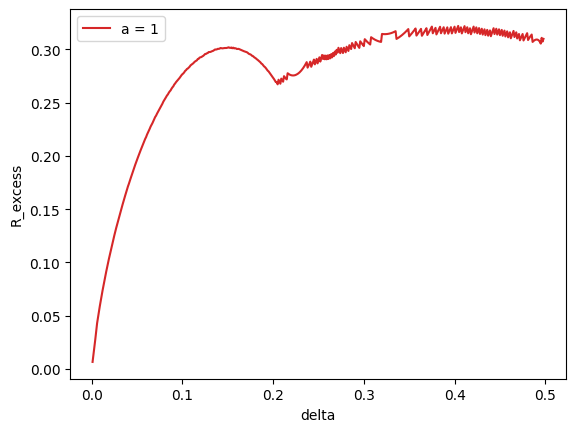

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

del_vals = []
y_max = []
rgv_max = []
theor_dist = []
w_max = []
a = 1

for x in range(1, 499, 1):
  delta = x/1000
  print("delta = ", delta)
  del_vals.append(delta)
  entdelta = entropy([delta,1-delta], base=2)

  max_fac = 0.99*(1/delta)
  min_fac = (1-np.sqrt(1-2*delta))/(2*delta)
  step_size = 0.01

  fac_data=np.arange(min_fac,max_fac,step_size)
  y_data=np.arange(min_fac,max_fac,step_size)
  rgv_data=np.arange(min_fac,max_fac,step_size)
  w_data=np.arange(min_fac,max_fac,step_size)

  i=0
  for fac in fac_data:
    w = delta*fac_data[i]
    w_data[i] = w
    T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]
    rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)
    entw = entropy([w,1-w], base=2)

    if ((delta + w) < 1):
        epsilon = a*delta*w*(1-w)
        lambd = a*delta*(w**2)
    else:
        epsilon = a*((1-w)**2)*(1-delta)
        lambd = a*w*(1-delta)*(1-w)

    theor_dist = np.array([(((1-w)**2)*(1-delta)) - epsilon, (delta*w*(1-w)) - epsilon, (w*(1-delta)*(1-w)) + epsilon, (((1-w)**2)*delta) + epsilon, (delta*w*(1-w)) + lambd, ((w**2)*(1-delta)) + lambd, (delta*(w**2))-lambd, (w*(1-delta)*(1-w))-lambd])
    extr_dist = np.array([((1-w)**2)*(1-delta), delta*w*(1-w), w*(1-delta)*(1-w), ((1-w)**2)*delta, delta*w*(1-w), (w**2)*(1-delta), delta*(w**2), w*(1-delta)*(1-w)])
    # Calculate the L1 distance

    #l1_distance = np.linalg.norm(theor_dist - extr_dist, ord=1)
    #print(f"The L1 distance is: {l1_distance}")

    theor_value = (np.sum(entropy(theor_dist))/np.log(2))
    #if ( (delta + w) > 1):
    #    y_data[i] =  min(-w*(np.log2(w)) - (delta)*(np.log2(delta)) - (1 - w - delta)*(np.log2(delta + w - 1)),rgv)
    #else:
    #    y_data[i] =  min(-(1-w)*(np.log2(1-w)) - (1-delta)*(np.log2(1-delta)) + (1-delta-w)*(np.log2(1-delta-w)),rgv)

    y_data[i] = min(2*entw+entdelta - theor_value, rgv)
    i = i+1

  y_max.append(max(y_data))
  rgv_max.append(max(rgv_data))
  w_max.append(w_data[np.argmax(y_data)])
  print("rate excess over GV for this delta = ", max(y_data))
  print("best w for this delta = ", w_data[np.argmax(y_data)])

fig = plt.figure()
plt.plot(del_vals,y_max, label=f'a = {a}',color='tab:red')
#plt.plot(del_vals,rgv_max, color='tab:blue')
plt.xlabel("delta")
plt.ylabel("R_excess")
plt.legend()
plt.show()

As shown in the diagrams, as a tends to 0, $R_{excess}$ gets closer to 0. When $\epsilon = \lambda = 0$, $R_{excess}$ is approximately $10^{-16}$ and the distribution p ≈ $p'_{X C' X'}$. As a gets larger, $R_{excess}$ gets larger; for $a = 1$, $R_{excess} ≈ 0.302$. Note the sharp point is due to the $min(R_{GV}, 2H(w)+H(δ)-H_{p_{XC'X'}})$ nature of $R_{excess}$; for small delta, external expurgation (due to another cloud) is limiting, and for large delta (0.25+), internal expurgation (same cloud) is limiting.

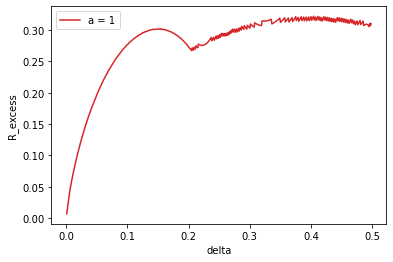 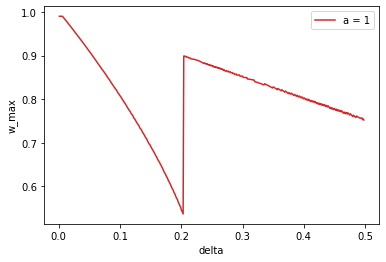

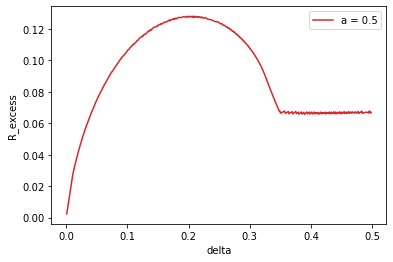 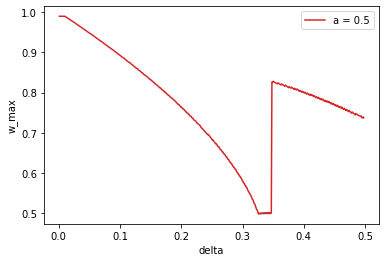)


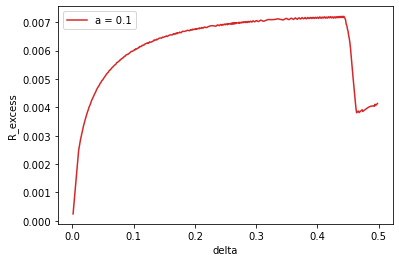 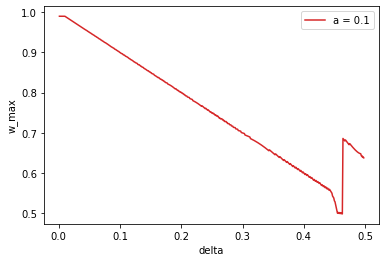

<ipython-input-2-1ed62509ca55>:27: RuntimeWarning: divide by zero encountered in log2
  y_vals[j, i] =  min(-(1-w)*(np.log2(1-w)) - (1-delta)*(np.log2(1-delta)) + (1-delta-w)*(np.log2(1-delta-w)),rgv)
<ipython-input-2-1ed62509ca55>:27: RuntimeWarning: invalid value encountered in scalar multiply
  y_vals[j, i] =  min(-(1-w)*(np.log2(1-w)) - (1-delta)*(np.log2(1-delta)) + (1-delta-w)*(np.log2(1-delta-w)),rgv)


Maximum Value of the Function: 0.3017347831351667
Corresponding w: 0.6867134268537075
Corresponding delta: 0.15199999999999989
Minimum Value of the Function: 1.1102230246251565e-16
Corresponding w: 0.05
Corresponding delta: 0.09499999999999992


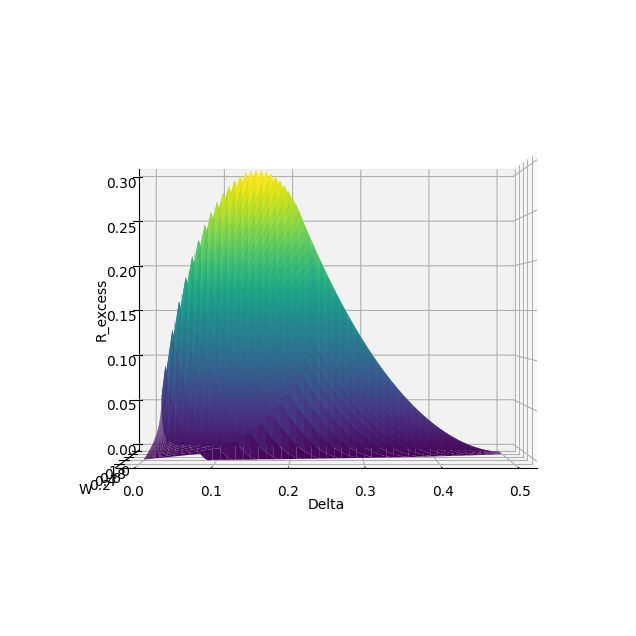

In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Parameters
delta_range = np.arange(0.01, 0.49, 0.001)  # Delta range
w_range = np.linspace(0.05, 0.99, 500)  # Fixed w range, independent of delta

# Initialize arrays for data collection
DELTA, W = np.meshgrid(delta_range, w_range)
y_vals = np.full(DELTA.shape, np.nan)  # Initialize with NaNs

# Loop through each combination of delta and w
for i, delta in enumerate(delta_range):
    entdelta = entropy([delta, 1 - delta], base=2)
    for j, w in enumerate(w_range):
        if delta <= 2 * w * (1 - w):  # Check the condition
            T = [1 - w - delta / 2, delta / 2, delta / 2, w - delta / 2]
            rgv = 2 * entropy([w, 1 - w], base=2) - entropy(T, base=2)
            entw = entropy([w, 1 - w], base=2)

            #y_vals[j, i] = ((1-w)**2)*(1-delta)
            if ( (delta + w) > 1):
                y_vals[j, i] =  min(-w*(np.log2(w)) - (delta)*(np.log2(delta)) - (1 - w - delta)*(np.log2(delta + w - 1)),rgv)
            else:
                y_vals[j, i] =  min(-(1-w)*(np.log2(1-w)) - (1-delta)*(np.log2(1-delta)) + (1-delta-w)*(np.log2(1-delta-w)),rgv)
        else:
            # Condition not met, leave as NaN
            pass

# Find the maximum value and its indices
max_value = np.nanmax(y_vals)
min_value = np.nanmin(y_vals)
max_indices = np.unravel_index(np.nanargmax(y_vals), y_vals.shape)
max_w = W[max_indices]
max_delta = DELTA[max_indices]
min_indices = np.unravel_index(np.nanargmin(y_vals), y_vals.shape)
min_w = W[min_indices]
min_delta = DELTA[min_indices]

print("Maximum Value of the Function:", max_value)
print("Corresponding w:", max_w)
print("Corresponding delta:", max_delta)
print("Minimum Value of the Function:", min_value)
print("Corresponding w:", min_w)
print("Corresponding delta:", min_delta)

# 3D Surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(DELTA, W, y_vals, cmap='viridis')
ax.view_init(elev=0, azim=-90)
ax.set_xlabel('Delta')
ax.set_ylabel('W')
ax.set_zlabel('R_excess')

plt.show()

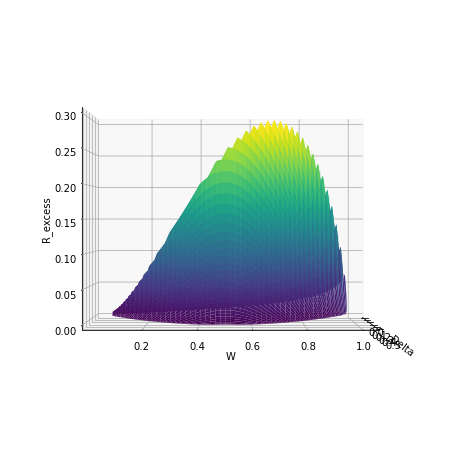 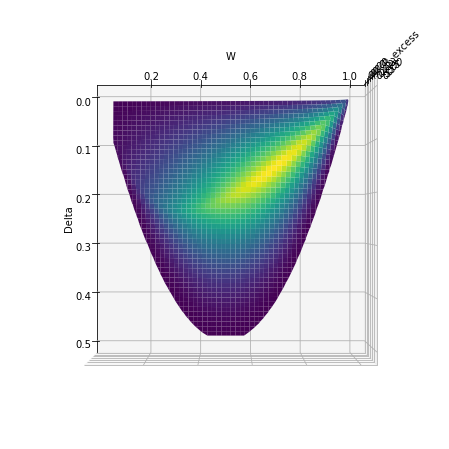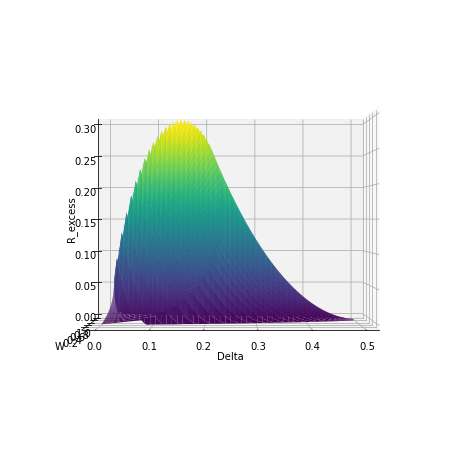 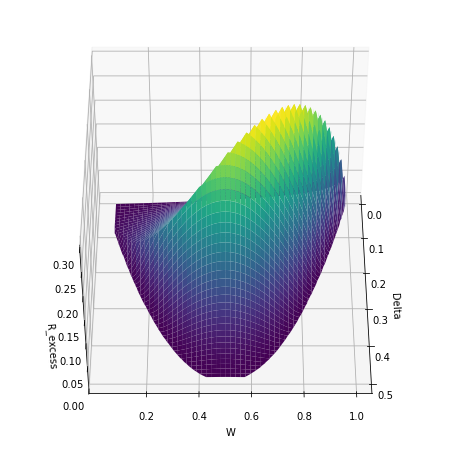

### Code for ( $\delta, w, R_s, R_c$ ) tuples

In [ ]:
import numpy as np
from scipy.stats import entropy

for x in range(1, 49, 1):
  delta = x/100
  print("delta = ", delta)
  entdelta = entropy([delta,1-delta], base=2)

  step_size = 0.05
  w_data=np.arange((1-np.sqrt(1-2*delta))/2,0.5,step_size)

  for w in w_data:
    T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]
    rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)
    entw = entropy([w,1-w], base=2)
    Rs_data=np.arange(0,rgv,step_size)
    for Rs in Rs_data:
        LP = entropy([0.5 - np.sqrt(delta*(1-delta)), 0.5 + np.sqrt(delta*(1-delta))], base=2)
        d_conv_w = [(delta)*(1-w) + w*(1-delta), 1-((delta)*(1-w) + w*(1-delta)) ]
        Rc_data=np.arange(1-entdelta-Rs,1-entropy(d_conv_w),step_size)
        for Rc in Rc_data:
            if (Rc + Rs > 1-entdelta):
                print("Delta: ",delta, "w: ",w, "Rc: ", Rc, "Rs: ", Rs)
                print("Rate excess: ", Rc + Rs - (1-entdelta))

Streaming output truncated to the last 5000 lines.
Rate excess:  0.09999999999999998
Delta:  0.03 w:  0.21523201425836713 Rc:  0.4056081421684237 Rs:  0.55
Rate excess:  0.1499999999999999
Delta:  0.03 w:  0.21523201425836713 Rc:  0.4556081421684237 Rs:  0.55
Rate excess:  0.19999999999999996
Delta:  0.03 w:  0.2652320142583671 Rc:  0.4056081421684238 Rs:  0.45
Rate excess:  0.050000000000000044
Delta:  0.03 w:  0.2652320142583671 Rc:  0.3556081421684238 Rs:  0.5
Rate excess:  0.050000000000000044
Delta:  0.03 w:  0.2652320142583671 Rc:  0.4056081421684238 Rs:  0.5
Rate excess:  0.09999999999999998
Delta:  0.03 w:  0.2652320142583671 Rc:  0.30560814216842375 Rs:  0.55
Rate excess:  0.050000000000000044
Delta:  0.03 w:  0.2652320142583671 Rc:  0.35560814216842374 Rs:  0.55
Rate excess:  0.09999999999999998
Delta:  0.03 w:  0.2652320142583671 Rc:  0.4056081421684237 Rs:  0.55
Rate excess:  0.1499999999999999
Delta:  0.03 w:  0.2652320142583671 Rc:  0.2556081421684237 Rs:  0.6000000000000

To visualise the set of tuples beating the GV bound, I have used a 3D scatter plot, with axes $w, \delta, R_s $ and $R_c$ is shown by a color scale. A result of a higher resolution run is inserted below.

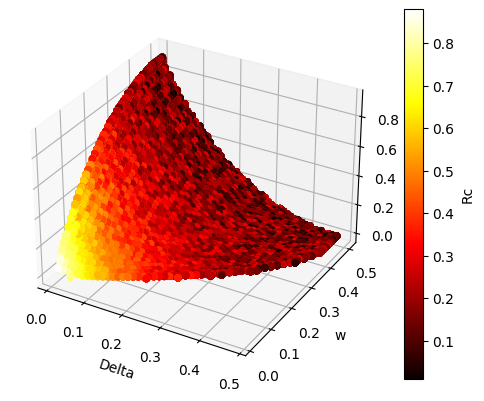

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import entropy

delta_vals = []
w_vals = []
Rs_vals = []
Rc_vals = []


for x in range(1, 49, 1):
  delta = x/100
  entdelta = entropy([delta,1-delta], base=2)

  step_size = 0.01
  w_data=np.arange((1-np.sqrt(1-2*delta))/2,0.5,step_size)

  for w in w_data:
    T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]
    rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)
    entw = entropy([w,1-w], base=2)
    Rs_data=np.arange(0,rgv,step_size)
    for Rs in Rs_data:
        LP = entropy([0.5 - np.sqrt(delta*(1-delta)), 0.5 + np.sqrt(delta*(1-delta))], base=2)
        d_conv_w = [(delta)*(1-w) + w*(1-delta), 1-((delta)*(1-w) + w*(1-delta)) ]
        Rc_data=np.arange(1-entdelta-Rs,1-entropy(d_conv_w),step_size)
        for Rc in Rc_data:
            if (Rc + Rs > 1-entdelta):
                delta_vals.append(delta)
                w_vals.append(w)
                Rc_vals.append(Rc)
                Rs_vals.append(Rs)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(delta_vals, w_vals, Rs_vals, c=Rc_vals, cmap=plt.hot())
ax.set_xlabel('Delta')
ax.set_ylabel('w')
ax.set_zlabel('Rs')
fig.colorbar(img, label='Rc') #Colour represents Rc value

plt.show()

High-res run:

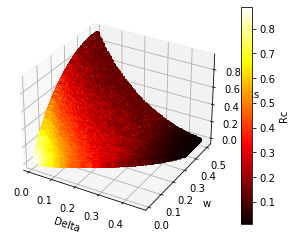

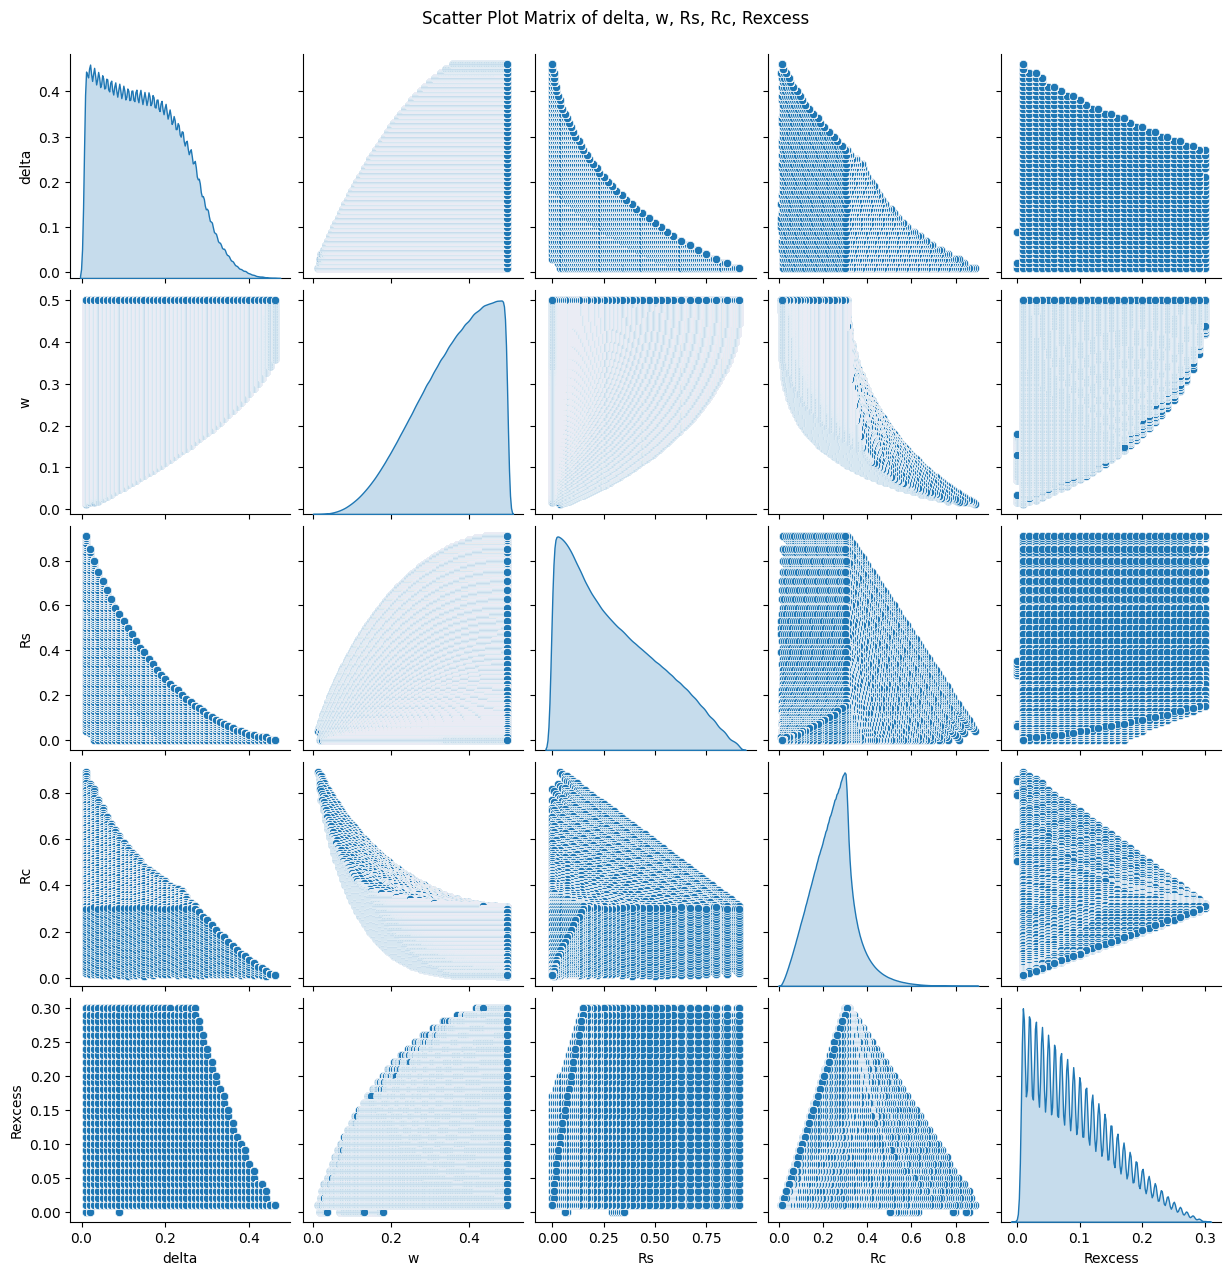

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import entropy
import pandas as pd

delta_vals = []
w_vals = []
Rs_vals = []
Rc_vals = []
Rexcess_vals = []

for x in range(1, 49, 1):
  delta = x/100
  entdelta = entropy([delta,1-delta], base=2)

  step_size = 0.01
  w_data=np.arange((1-np.sqrt(1-2*delta))/2,0.5,0.001)

  for w in w_data:
    T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]
    rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)
    entw = entropy([w,1-w], base=2)
    Rs_data=np.arange(0,rgv,step_size)
    for Rs in Rs_data:
        LP = entropy([0.5 - np.sqrt(delta*(1-delta)), 0.5 + np.sqrt(delta*(1-delta))], base=2)
        d_conv_w = [(delta)*(1-w) + w*(1-delta), 1-((delta)*(1-w) + w*(1-delta)) ]
        Rc_data=np.arange(1-entdelta-Rs,min(LP,1-entropy(d_conv_w)),step_size)
        for Rc in Rc_data:
            if (Rc + Rs > 1-entdelta):
                delta_vals.append(delta)
                w_vals.append(w)
                Rc_vals.append(Rc)
                Rs_vals.append(Rs)
                Rexcess_vals.append(Rc + Rs - (1-entdelta))

# Creating a DataFrame
df = pd.DataFrame({
    'delta': delta_vals,
    'w': w_vals,
    'Rs': Rs_vals,
    'Rc': Rc_vals,
    'Rexcess': Rexcess_vals
})

sns.pairplot(df, diag_kind='kde')
plt.suptitle("Scatter Plot Matrix of delta, w, Rs, Rc, Rexcess", y=1.02)
plt.show()

This is a scatter plot matrix which shows the pairwise relationships between $\delta, w, R_s, R_c$ and $R_{excess}$.

### Code with additional constraints


In [ ]:

import cvxpy as cp
import numpy as np
from scipy.stats import entropy

step_size = 0.01
max_rates = []
dists = []

for x in range(1, 49, 1):
  delta = x/100
  del_rates=[]
  # H(delta)
  entdelta = entropy([delta,1-delta], base=2)
  print("delta = ", delta)

  w_data=np.arange((1-np.sqrt(1-2*delta))/2,0.5,step_size)
  for w in w_data:
    # H(w)
    entw = entropy([w,1-w], base=2)
    # Evaluate Rgv(delta,w)
    T = [1-w - delta/2, delta/2, delta/2 , w - delta/2]
    rgv = 2*entropy([w,1-w],base=2) - entropy(T,base=2)

    Rs_data=np.arange(0,rgv,step_size)
    for Rs in Rs_data:
        LP = entropy([0.5 - np.sqrt(delta*(1-delta)), 0.5 + np.sqrt(delta*(1-delta))], base=2)
        d_conv_w = [(delta)*(1-w) + w*(1-delta), 1-((delta)*(1-w) + w*(1-delta)) ]
        #d_conv_w = [(1-delta)*(1-w),(delta)*(1-w), delta*w]
        Rc_data=np.arange(1-entdelta-Rs,1-entropy(d_conv_w, base=2),step_size)
        #print(Rs, 1-entdelta-Rs < 1-entropy(d_conv_w, base=2))
        for Rc in Rc_data: # For all non-empty S(delta) tuples
            # Determine p_{CC'XX'}
            x = cp.Variable(16,pos=True)
            p_XCCp = [x[0]+x[1],x[2]+x[3],x[4]+x[5],x[6]+x[7],x[8]+x[9],x[10]+x[11],x[12]+x[13],x[14]+x[15]]
            p_XpCCp = [x[0]+x[2],x[1]+x[3],x[4]+x[6],x[5]+x[7],x[8]+x[10],x[9]+x[11],x[12]+x[14],x[13]+x[15]]
            p_CCp = [x[0]+x[1]+x[2]+x[3],x[4]+x[5]+x[6]+x[7],x[8]+x[9]+x[10]+x[11],x[12]+x[13]+x[14]+x[15]]

            constraints=[]
            constraints += [cp.sum(x) == 1]
            constraints += [x[0]+x[1]+x[4]+x[5] == (1-w)/2]
            constraints += [x[2]+x[3]+x[6]+x[7] == w/2]
            constraints += [x[8]+x[9]+x[12]+x[13] == w/2]
            constraints += [x[10]+x[11]+x[14]+x[15] == (1-w)/2]

            constraints += [x[0]+x[2]+x[8]+x[10] == (1-w)/2]
            constraints += [x[1]+x[3]+x[9]+x[11] == w/2]
            constraints += [x[4]+x[6]+x[12]+x[14] == w/2]
            constraints += [x[5]+x[7]+x[13]+x[15] == (1-w)/2]

            constraints += [x[1]+x[5]+x[9]+x[13]+x[2]+x[6]+x[10]+x[14] == delta]
            constraints += [x[1] == x[2]]
            constraints += [x[4] == x[8]]
            constraints += [x[5] == x[10]]
            constraints += [x[6] == x[9]]
            constraints += [x[7] == x[11]]
            constraints += [x[14] == x[13]]

            constraints += [(cp.sum(cp.entr(x))/np.log(2)) + Rs + Rc >= 2 + 2*entw]
            constraints += [(cp.sum(cp.entr(cp.hstack(p_XCCp)))/np.log(2)) + Rc >= 2 + entw]
            constraints += [(cp.sum(cp.entr(cp.hstack(p_XpCCp)))/np.log(2)) + Rc >= 2 + entw]
            constraints += [(cp.sum(cp.entr(cp.hstack(p_CCp)))/np.log(2)) + Rc >= 2]

            # Dummy objective as this is a feasibility study
            objective = cp.Minimize(0)
            problem = cp.Problem(objective, constraints)
            result = problem.solve()
            #result = problem.solve(solver=cvx.SCS, eps=1e-5) - to provide tolerance of solution
            print(problem.status)
            #Check if the problem is feasible
            if problem.status == cp.OPTIMAL or problem.status == cp.OPTIMAL_INACCURATE:
                print("A feasible solution exists:", x.value)
                dists.append(x.value)
            else:
                print("The problem is infeasible, i.e □(δ,w,Rc,Rs) is empty for this tuple.")
                del_rates.append(Rc + Rs - (1 - entdelta))
                # print("Delta: ",delta, "w: ",w, "Rc: ", Rc, "Rs: ", Rs)
                # print("Rate excess: ", Rc + Rs - (1-entdelta))

    if del_rates: max_rates.append(max(del_rates)) # Checks del_rates are non-empty to prevent error

if max_rates: print(max_rates) # Checks max_rates is not empty

delta =  0.01
delta =  0.02
delta =  0.03
delta =  0.04
delta =  0.05
delta =  0.06
delta =  0.07
delta =  0.08
delta =  0.09
delta =  0.1
delta =  0.11
delta =  0.12
delta =  0.13
delta =  0.14
delta =  0.15
delta =  0.16
delta =  0.17
delta =  0.18
delta =  0.19
delta =  0.2
delta =  0.21
delta =  0.22
delta =  0.23
delta =  0.24
delta =  0.25
delta =  0.26
delta =  0.27
delta =  0.28
delta =  0.29
delta =  0.3
delta =  0.31
delta =  0.32
delta =  0.33
delta =  0.34
delta =  0.35
delta =  0.36
delta =  0.37
delta =  0.38
delta =  0.39
delta =  0.4
delta =  0.41
delta =  0.42
delta =  0.43
delta =  0.44
delta =  0.45
delta =  0.46
delta =  0.47
delta =  0.48


This unfortunately does not seem to be outputting tuples for empty constraint sets (i.e. when □(δ, w, Rc, Rs) is empty). However, this doesn't seem to be because of the optimisation, instead it seems that there are no valid ($\delta, w, R_s, R_c$) tuples in the first place - the lower bound of the cloud rate $R_c$ is apparently always above it's upper bound - this is what is preventing the feasibility search/optimisation from taking place (you can see this by uncommenting '*print(Rs, 1-entdelta-Rs < 1-entropy(d_conv_w, base=2))*'). Need to explore this further.

Retrying with larger alphabet:

In [ ]:

import cvxpy as cp
import numpy as np
from scipy.stats import entropy

# q-ary codes
q=3
step_size = 0.01
max_rates = []
wstar_dist = []
dists = []

for x in range(1, 49, 1):
  delta = x/100
  del_rates=[]
  # H(delta)
  entdelta = entropy([delta,1-delta], base=q)
  print("delta = ", delta)

  w_data=np.arange((1-np.sqrt(1-2*delta))/2,0.5,step_size)
  for w in w_data:
    # H(w)
    for i in range(q):
      if i != 0:
        wstar_dist.append(w/(q-1))
      else:
        wstar_dist.append(1-w)

    entwstar = entropy(wstar_dist, base=q)
    # Evaluate Rgv(delta,w) for q-ary case:
    rgv = (1-w-(delta/q))*np.log((1-w-(delta/q))/(1-w)**2)+ delta*np.log(delta/(q*(1-w)*w)) + ((delta + q*(w-delta))/q)*np.log((w**2*q*(w-delta)-w**2*delta)/(q*(q-1)))

    Rs_data=np.arange(0,rgv,step_size)
    for Rs in Rs_data:
        d_conv_w = [(delta)*(1-w) + w*(1-delta), 1-((delta)*(1-w) + w*(1-delta)) ]
        #d_conv_w = [(1-delta)*(1-w),(delta)*(1-w), delta*w]
        Rc_data=np.arange(1-entdelta-Rs,1-entropy(d_conv_w, base=q),step_size)
        #print(Rs, 1-entdelta-Rs < 1-entropy(d_conv_w, base=q))
        for Rc in Rc_data: # For all non-empty S(delta) tuples
            # Determine p_{CC'XX'}
            x = cp.Variable(16,pos=True)
            p_XCCp = [x[0]+x[1],x[2]+x[3],x[4]+x[5],x[6]+x[7],x[8]+x[9],x[10]+x[11],x[12]+x[13],x[14]+x[15]]
            p_XpCCp = [x[0]+x[2],x[1]+x[3],x[4]+x[6],x[5]+x[7],x[8]+x[10],x[9]+x[11],x[12]+x[14],x[13]+x[15]]
            p_CCp = [x[0]+x[1]+x[2]+x[3],x[4]+x[5]+x[6]+x[7],x[8]+x[9]+x[10]+x[11],x[12]+x[13]+x[14]+x[15]]

            constraints=[]
            constraints += [cp.sum(x) == 1]
            constraints += [x[0]+x[1]+x[4]+x[5] == (1-w)/2]
            constraints += [x[2]+x[3]+x[6]+x[7] == w/2]
            constraints += [x[8]+x[9]+x[12]+x[13] == w/2]
            constraints += [x[10]+x[11]+x[14]+x[15] == (1-w)/2]

            constraints += [x[0]+x[2]+x[8]+x[10] == (1-w)/2]
            constraints += [x[1]+x[3]+x[9]+x[11] == w/2]
            constraints += [x[4]+x[6]+x[12]+x[14] == w/2]
            constraints += [x[5]+x[7]+x[13]+x[15] == (1-w)/2]

            constraints += [x[1]+x[5]+x[9]+x[13]+x[2]+x[6]+x[10]+x[14] == delta]
            constraints += [x[1] == x[2]]
            constraints += [x[4] == x[8]]
            constraints += [x[5] == x[10]]
            constraints += [x[6] == x[9]]
            constraints += [x[7] == x[11]]
            constraints += [x[14] == x[13]]

            # q-ary convex constraints
            constraints += [(cp.sum(cp.entr(x))/np.log(q)) + Rs + Rc >= 2*np.log(q) + 2*entwstar]
            constraints += [(cp.sum(cp.entr(cp.hstack(p_XCCp)))/np.log(q)) + Rc >= 2*np.log(q) + entwstar]
            constraints += [(cp.sum(cp.entr(cp.hstack(p_XpCCp)))/np.log(q)) + Rc >= 2*np.log(q) + entwstar]
            constraints += [(cp.sum(cp.entr(cp.hstack(p_CCp)))/np.log(q)) + Rc >= 2*np.log(q)]

            # Dummy objective as this is a feasibility study
            objective = cp.Minimize(0)
            problem = cp.Problem(objective, constraints)
            result = problem.solve()
            #result = problem.solve(solver=cvx.SCS, eps=1e-5) - to provide tolerance of solution

            #Check if the problem is feasible
            if problem.status == cp.OPTIMAL or problem.status == cp.OPTIMAL_INACCURATE:
                print("A feasible solution exists:", x.value)
                dists.append(x.value)
            else:
                print("The problem is infeasible, i.e □(δ,w,Rc,Rs) is empty for this tuple.")
                del_rates.append(Rc + Rs - (rgv))
                # print("Delta: ",delta, "w: ",w, "Rc: ", Rc, "Rs: ", Rs)
                # print("Rate excess: ", Rc + Rs - (1-entdelta))

    if del_rates: max_rates.append(max(del_rates)) # Checks del_rates are non-empty to prevent error

if max_rates: print(max_rates) # Checks max_rates is not empty

delta =  0.01


<ipython-input-19-f34c19c7bc4b>:30: RuntimeWarning: invalid value encountered in log
  rgv = (1-w-(delta/q))*np.log((1-w-(delta/q))/(1-w)**2)+ delta*np.log(delta/(q*(1-w)*w)) + ((delta + q*(w-delta))/q)*np.log((w**2*q*(w-delta)-w**2*delta)/(q*(q-1)))


ValueError: arange: cannot compute length

Appears to not be working, but I think it may be the case that the optimiser is just freezing on the upper bound of Rc.

# Single constraint q-ary case



$$
max_{\substack{\delta,w}} (\log{q} - H_{q}(\delta, w)) - [(\log{q} - H_{q}(\delta, w)) - R_{q, GV, w}]
$$

In [ ]:
import cvxpy as cp
import numpy as np
from scipy.stats import entropy

step_size = 0.01
max_rates = []
dists = []

for x in range(1, 49, 1):
  delta = x/100
  del_rates=[]
  # H(delta)
  entdelta = entropy([delta,1-delta], base=2)
  print("delta = ", delta)

  w_data=np.arange((1-np.sqrt(1-2*delta))/2,0.5,step_size)
  for w in w_data:

       x = cp.Variable(np.count_nonzero(x_mask))

       term = x.T*y[x_mask] - self.c*cp.norm1(cp.diag(w[x_mask]) * x)
       constraints = [ cp.quad_form(x, self.B[np.ix_(x_mask, x_mask)]) &lt;= 1]
       problem = cp.Problem(cp.Maximize(term), constraints)



    if del_rates: max_rates.append(max(del_rates)) # Checks del_rates are non-empty to prevent error

if max_rates: print(max_rates) # Checks max_rates is not empty

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 27)



# Aside: Gaussian Elimination of Constraints

The constraints on the variables $x_{0}, x_{1}, x_{2}, ...$ can be rewritten as:

\

$$  	\begin{bmatrix}
1 \ 1 \ 0 \ 0 \ 1 \ 1 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \\ 0 \ 0 \ 1 \ 1 \ 0 \ 0 \ 1 \ 1 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \\ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 1 \ 1 \ 0 \ 0 \ 1 \ 1 \ 0 \ 0 \\ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 1 \ 1 \ 0 \ 0 \ 1 \ 1 \\ 1 \ 0 \ 1 \ 0 \ 0 \ 0 \ 0 \ 0 \ 1 \ 0 \ 1 \ 0 \ 0 \ 0 \ 0 \ 0 \\ 0 \ 1 \ 0 \ 1 \ 0 \ 0 \ 0 \ 0 \ 0 \ 1 \ 0 \ 1 \ 0 \ 0 \ 0 \ 0 \\ 0 \ 0 \ 0 \ 0 \ 1 \ 0 \ 1 \ 0 \ 0 \ 0 \ 0 \ 0 \ 1 \ 0 \ 1 \ 0 \\ 0 \ 0 \ 0 \ 0 \ 0 \ 1 \ 0 \ 1 \ 0 \ 0 \ 0 \ 0 \ 0 \ 1 \ 0 \ 1 \\ 0 \ 1 \ 1 \ 0 \ 0 \ 1 \ 1 \ 0 \ 0 \ 1 \ 1 \ 0 \ 0 \ 1 \ 1 \ 0 \\ 0 \ 1 \ -1 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \\ 0 \ 0 \ 0 \ 0 \ 1 \  0 \ 0 \ 0 \ -1 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \\ 0 \ 0 \ 0 \ 0 \ 0 \ 1 \ 0 \ 0 \ 0 \ 0 \ -1 \ 0 \ 0 \ 0 \ 0 \ 0 \\ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 1 \ 0 \ 0 \ -1 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \\ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 1 \ 0 \ 0 \ 0 \ -1 \ 0 \ 0 \ 0 \ 0 \\ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ 0 \ -1 \ 1 \ 0 \\ 1 \ 1 \ 1 \ 1 \ 1 \ 1 \ 1 \ 1 \ 1 \ 1 \ 1 \ 1 \ 1 \ 1 \ 1 \ 1
\end{bmatrix}
 \begin{bmatrix}
      x_{0} \\ x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \\ x_{5} \\ x_{6} \\ x_{7} \\ x_{8} \\ x_{9} \\ x_{10} \\ x_{11} \\ x_{12} \\ x_{13} \\ x_{14} \\ x_{15}
     \end{bmatrix}
     =
      \begin{bmatrix}
1/2 - w/2 \\ w/2 \\ w/2 \\ 1/2 - w/2 \\ 1/2 - w/2 \\ w/2 \\ w/2 \\ 1/2 - w/2 \\ δ \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1
     \end{bmatrix}
$$
\
This can be reduced to the following (row reduced echelon form):

\

$$  	\begin{bmatrix}
    1 \ 0 \ 0 \ 0 \ 0 \ 0  \ 0 \ 0 \ 0 \ -2 \ 0 \  0 \ -1 \ 0 \ -2 \ 0   \\  0  \ 1  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 1  \ 0  \ -1  \ 0  \ 0  \ 0  \ -1   \\ 0  \ 0  \ 1  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 1  \ 0  \ -1  \ 0  \ 0  \ 0  \ -1   \\ 0  \ 0  \ 0  \ 1  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 2  \ 0  \ 0  \ 0  \ 1  \\ 0  \ 0  \ 0  \ 0  \ 1  \ 0  \ 0  \ 0  \ 0  \ 1  \ 0  \ 0  \ 1  \ 0  \ 1  \ 0   \\  0  \ 0  \ 0  \ 0  \ 0  \ 1  \ 0  \ 0  \ 0  \ 0  \ 0  \ 1  \ 0  \ 0  \ 1  \ 1  \\  0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 1  \ 0  \ 0  \ -1  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \\  0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 1  \ 0  \ 0  \ 0  \ -1  \ 0  \ 0  \ 0  \ 0  \ 0  \\  0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 1  \ 1  \ 0  \ 0  \ 1  \ 0  \ 1  \ 0   \\  0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 1  \ 1  \ 0  \ 0  \ 1  \ 1   \\  0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 1  \ -1  \ 0  \ 0  \\  0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \\  0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \\  0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \\  0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \\  0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0  \ 0
\end{bmatrix}
 \begin{bmatrix}
      x_{0} \\ x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \\ x_{5} \\ x_{6} \\ x_{7} \\ x_{8} \\ x_{9} \\ x_{10} \\ x_{11} \\ x_{12} \\ x_{13} \\ x_{14} \\ x_{15}
     \end{bmatrix}
     =
      \begin{bmatrix}
-δ/2 - w + 1/2  \\ δ/2 + w/2 - 1/2 \\ δ/2 + w/2 - 1/2 \\ 1/2 - δ/2\\ w/2 \\ 1/2 - w/2 \\ 0 \\ 0 \\ w/2 \\ 1/2 - w/2 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
     \end{bmatrix}
$$
\
Multiple rows of all zeros therefore system of equations have infinitely many solutions, solutions can only be written parametrically. Five new parameters, $τ_{0}, τ_{1}, τ_{2}, τ_{3}$ and $\tau_{4}$ are introduced due to 5 rows being zero.

\

$$
 \begin{bmatrix}
      x_{0} \\ x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \\ x_{5} \\ x_{6} \\ x_{7} \\ x_{8} \\ x_{9} \\ x_{10} \\ x_{11} \\ x_{12} \\ x_{13} \\ x_{14} \\ x_{15}
     \end{bmatrix}
     =
\begin{bmatrix}
-δ/2 + 2τ_{0} + \tau_{2} + 2 τ_{3} - w + 1/2 \\
   δ/2 - \tau_{0} + \tau_{1} + \tau_{4} + w/2 - 1/2 \\
   δ/2 - \tau_{0} + \tau_{1} + \tau_{4} + w/2 - 1/2 \\
             -δ/2 - 2 \tau_{1} - \tau_{4} + 1/2 \\
              - \tau_{0} - \tau_{2} - \tau_{3} + w/2 \\
        -\tau_{1} - \tau_{3} - \tau_{4} - w/2 + 1/2 \\
                                   \tau_{0} \\
                                   \tau_{1} \\
              -\tau_{0} - \tau_{2} - \tau_{3} + w/2 \\
                                   \tau_{0} \\
        -\tau_{1} - \tau_{3} - \tau_{4} - w/2 + 1/2 \\
                                   \tau_{1} \\
                                   \tau_{2} \\
                                   \tau_{3} \\
                                   \tau_{3} \\
                                   \tau_{4} \\
\end{bmatrix}
$$
\
Expressing the above system as a vector equation,


\

$$ \vec{x} =  \begin{bmatrix}
      x_{0} \\ x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \\ x_{5} \\ x_{6} \\ x_{7} \\ x_{8} \\ x_{9} \\ x_{10} \\ x_{11} \\ x_{12} \\ x_{13} \\ x_{14} \\ x_{15}
     \end{bmatrix}
     = τ_{0}\begin{bmatrix}
      2 \\ -1 \\ -1 \\ 0 \\ -1 \\ 0 \\ 1 \\ 0 \\ -1 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
     \end{bmatrix}
    + τ_{1} \begin{bmatrix}
      0 \\ 1 \\ 1 \\ -2 \\ 0 \\ -1 \\ 0 \\ 1 \\ 0 \\ 0 \\ -1 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0
     \end{bmatrix}
     + τ_{2}\begin{bmatrix}
      1 \\ 0 \\ 0 \\ 0 \\ -1 \\ 0 \\ 0 \\ 0 \\ -1 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0
     \end{bmatrix}
    + τ_{3} \begin{bmatrix}
      2 \\ 0 \\ 0 \\ 0 \\ -1 \\ -1 \\ 0 \\ 0 \\ -1 \\ 0 \\ -1 \\ 0 \\ 0 \\ 1 \\ 1 \\ 0
     \end{bmatrix}
     + τ_{4} \begin{bmatrix}
      0 \\ 1 \\ 1 \\ -1 \\ 0 \\ -1 \\ 0 \\ 0 \\ 0 \\ 0 \\ -1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1
     \end{bmatrix}
       + \begin{bmatrix}
      1/2 -δ/2 -w \\ δ/2 + w/2 - 1/2 \\ δ/2 + w/2 - 1/2 \\ 1/2-δ/2 \\ w/2 \\ 1/2 - w/2 \\ 0 \\ 0 \\ w/2 \\ 0 \\ 1/2-w/2 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
     \end{bmatrix}
$$

\


Therefore, the solution set is:

\

$$
Span \{\begin{bmatrix}
      2 \\ -1 \\ -1 \\ 0 \\ -1 \\ 0 \\ 1 \\ 0 \\ -1 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
     \end{bmatrix}, \begin{bmatrix}
      0 \\ 1 \\ 1 \\ -2 \\ 0 \\ -1 \\ 0 \\ 1 \\ 0 \\ 0 \\ -1 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0
     \end{bmatrix},
     \begin{bmatrix}
      1 \\ 0 \\ 0 \\ 0 \\ -1 \\ 0 \\ 0 \\ 0 \\ -1 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0
     \end{bmatrix},
      \begin{bmatrix}
      2 \\ 0 \\ 0 \\ 0 \\ -1 \\ -1 \\ 0 \\ 0 \\ -1 \\ 0 \\ -1 \\ 0 \\ 0 \\ 1 \\ 1 \\ 0
     \end{bmatrix},
     \begin{bmatrix}
      0 \\ 1 \\ 1 \\ -1 \\ 0 \\ -1 \\ 0 \\ 0 \\ 0 \\ 0 \\ -1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1
     \end{bmatrix}
     \}
      + \begin{bmatrix}
      1/2 -δ/2 -w \\ δ/2 + w/2 - 1/2 \\ δ/2 + w/2 - 1/2 \\ 1/2-δ/2 \\ w/2 \\ 1/2 - w/2 \\ 0 \\ 0 \\ w/2 \\ 0 \\ 1/2-w/2 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
     \end{bmatrix}.
$$

